### Aim: To detect a subject is wearing glasses or not
Can be done easily by detecting the presence of a nose bridge in a pair of glasses

### Steps

- Get the facial landmark coordinates for the nasal area
- Crop the Image base on these landmarks
- Convert the image into black and white (White being the background and black being the details)
- Look of the presence a nasal strip in the nose (A strip of 0s (black pixels))
- If present than the subject is wearing glasses



### The libraries needed

In [31]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import statistics

### The face detection model 

In [5]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

### Facial Landmarks 

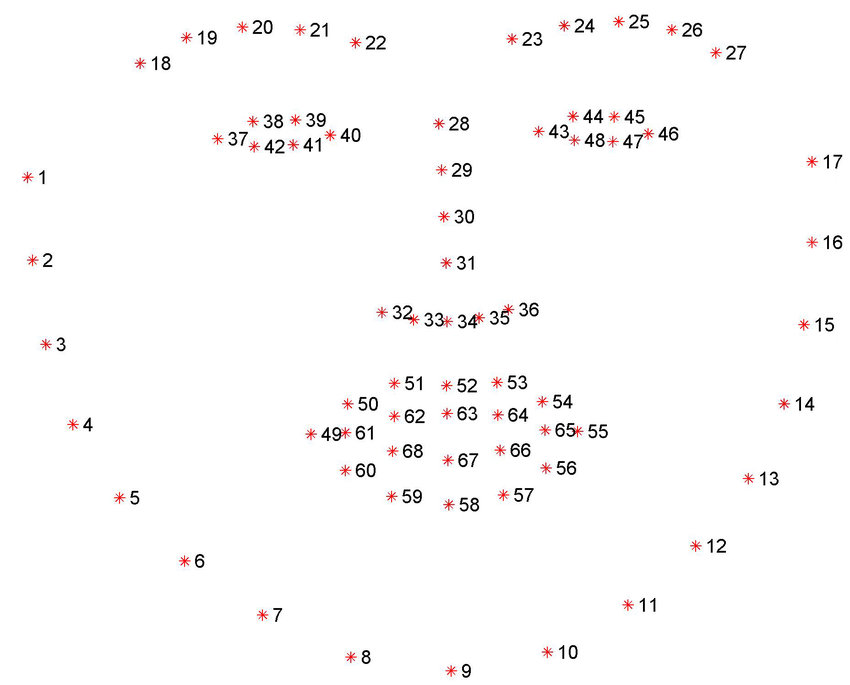

In [68]:
img = Image.open("Test_images/68-facial-landmarks.png")
img

### Test image

In [111]:
ls

Glasses_detection.ipynb                shape_predictor_68_face_landmarks.dat
Test_Images/


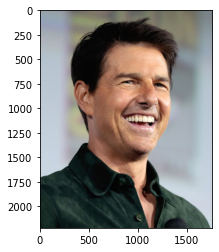

In [146]:
path = 'Test_Images/Tom_cruise.jpeg'
img = dlib.load_rgb_image(path)
plt.imshow(img)
    

rect = detector(img)[0]
sp = predictor(img, rect)
landmarks = np.array([[p.x, p.y] for p in sp.parts()])

nose_bridge_x = []
nose_bridge_y = []

In [147]:
nose_bridge_x = []
nose_bridge_y = []

for i in [28,29,30,31,33,34,35]:
        nose_bridge_x.append(landmarks[i][0])
        nose_bridge_y.append(landmarks[i][1])
        
        
### x_min and x_max
x_min = min(nose_bridge_x)
x_max = max(nose_bridge_x)

### ymin (from top eyebrow coordinate),  ymax
y_min = landmarks[20][1]
y_max = landmarks[31][1]

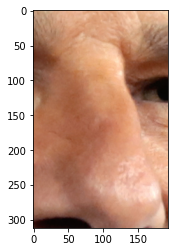

In [148]:
img2 = Image.open(path)
img2 = img2.crop((x_min,y_min,x_max,y_max))
plt.imshow(img2)

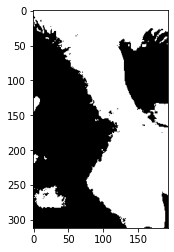

In [149]:
img = np.array(img2)
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = 128
im_bw = cv2.threshold(grayImage, thresh, 225, cv2.THRESH_BINARY)[1]

plt.imshow(im_bw,cmap=plt.get_cmap('gray'))

In [150]:
#### center strip
center_index = int(len(im_bw.T)/2)
center_index

center = im_bw.T[center_index]
center

array([225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
       225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,
         0, 225, 225, 225, 225, 225, 225, 225, 225,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### Note the strip across the nose bridge will be present on top section of the nose

In [151]:
### check one - mode of the background
if statistics.mode(center) == 0:
    center = 225-center

### check 2 - If any details present (shadows included)
if 0 in center:

### check 3 - If check 2 passed(details present) - look for a strip:
    count = 0
    for i in range(0,int(len(center)/2)):


        if i>0:
            if center[i] == 0 and count==0 and center[i-1]==225:
                count+=1

            elif center[i] == 0 and count>0:
                count +=1

            if count == 3:
                print('Glasses are present') 
                break

            if center[i] == 225:
                count = 0

    if count<3:
        print('Glasses are not present')
        
else:
    print('Glasses are not present')


Glasses are present


### Everything together in a function

In [159]:
def glasses_detector(path):
   
    img = dlib.load_rgb_image(path)
    
    if len(detector(img))==0:
        return('No face detected')
    rect = detector(img)[0]
    sp = predictor(img, rect)
    landmarks = np.array([[p.x, p.y] for p in sp.parts()])

    nose_bridge_x = []
    nose_bridge_y = []

    for i in [28,29,30,31,33,34,35]:
        nose_bridge_x.append(landmarks[i][0])
        nose_bridge_y.append(landmarks[i][1])

    ### x_min and x_max
    x_min = min(nose_bridge_x)
    x_max = max(nose_bridge_x)

    ### ymin (from top eyebrow coordinate),  ymax
    y_min = landmarks[20][1]
    y_max = landmarks[30][1]

    img2 = Image.open(path)
    img2 = img2.crop((x_min,y_min,x_max,y_max))

    img = np.array(img2)
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = 128
    im_bw = cv2.threshold(grayImage, thresh, 225, cv2.THRESH_BINARY)[1]
    
    
    #center strip
    center_index = int(len(im_bw.T)/2)
    center_index

    center = im_bw.T[center_index]
    center

    ### check one - mode of the background
    if statistics.mode(center) == 0:
        center = 225-center

    ### check 2 - If any details present (shadows included)
    if 0 in center:

    ### check 3 - If check 2 passed(details present) - look for a strip:
        count = 0
        for i in range(0,int(len(center)/2)):
           

            if i>0:
                if center[i] == 0 and count==0 and center[i-1]==225:
                    count+=1
                
                elif center[i] == 0 and count>0:
                    count +=1
                
                if count == 3:
                    return 1 #if glasses present return 1
                    

                if center[i] == 225:
                    count = 0
                    
        if count<3:
            return 0 #if glasses not present return 0
    else:
        return 0


### Looking at other test images

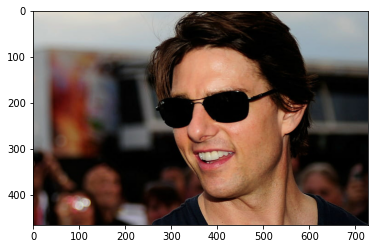

In [153]:
path = 'Test_Images/tom_glasses.jpeg'
img = dlib.load_rgb_image(path)
plt.imshow(img)

In [154]:
glasses_detector(path)

1

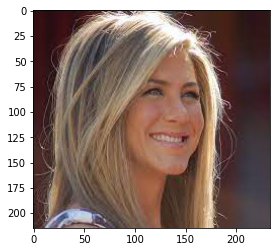

In [155]:
path = 'Test_Images/jen-an.jpeg'
img = dlib.load_rgb_image(path)
plt.imshow(img)

In [156]:
glasses_detector(path)

0

### Do I have Glasses?

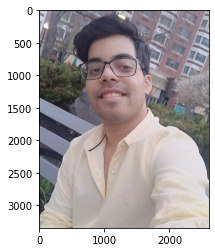

In [157]:
path = 'Test_Images/me.jpg'
img = dlib.load_rgb_image(path)
plt.imshow(img)
    

In [158]:
glasses_detector(path)

1

### Yep...